In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from PIL import Image

data_dir = '../UTKFace'
img_size = (48, 48)

def load_data_for_age_classification(data_dir, num_age_classes):
    images = []
    labels = []
    
    for filename in os.listdir(data_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            age_label = int(filename.split('_')[0])
            age_class = min(age_label // 4, num_age_classes - 1) 
            
            img_path = os.path.join(data_dir, filename)
            image = Image.open(img_path).resize(img_size).convert('L')
            image = np.array(image)
            
            images.append(image)
            labels.append(age_class)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

num_age_classes = (116 // 4) + 1 
images, labels = load_data_for_age_classification(data_dir, num_age_classes)

images = images.astype('float32') / 255.0

images = np.expand_dims(images, -1)

labels = to_categorical(labels, num_age_classes)

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [4]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

model_age = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_age_classes, activation='softmax')
])

model_age.summary()

model_age.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

checkpoint_age = tf.keras.callbacks.ModelCheckpoint('age3_classification_model.keras', 
                                                     monitor='val_accuracy',
                                                     mode='max',
                                                     save_best_only=True,
                                                     verbose=1)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

history_age = model_age.fit(X_train, y_train, 
                            epochs=100, 
                            batch_size=32, 
                            validation_data=(X_val, y_val),
                            callbacks=[checkpoint_age, early_stopping])


c:\Users\julia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,619,358 (6.18 MB)

 Trainable params: 1,619,358 (6.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.1659 - loss: 2.9627
Epoch 1: val_accuracy improved from -inf to 0.19169, saving model to age3_classification_model.keras
593/593 ━━━━━━━━━━━━━━━━━━━━ 134s 205ms/step - accuracy: 0.1659 - loss: 2.9625 - val_accuracy: 0.1917 - val_loss: 2.7601
Epoch 2/100
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.2288 - loss: 2.6436
Epoch 2: val_accuracy improved from 0.19169 to 0.25221, saving model to age3_classification_model.keras
593/593 ━━━━━━━━━━━━━━━━━━━━ 121s 203ms/step - accuracy: 0.2288 - loss: 2.6435 - val_accuracy: 0.2522 - val_loss: 2.4278
Epoch 3/100
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.2547 - loss: 2.4621
Epoch 3: val_accuracy improved from 0.25221 to 0.26466, saving model to age3_classification_model.keras
593/593 ━━━━━━━━━━━━━━━━━━━━ 118s 199ms/step - accuracy: 0.2547 - loss: 2.4621 - val_accuracy: 0.2647 - val_loss: 2.3149
Epoch 4/100
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accu

In [5]:
best_age_model = tf.keras.models.load_model('age3_classification_model.keras')

val_loss, val_acc = best_age_model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_acc * 100:.2f}%')


149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.3213 - loss: 2.0425
Validation accuracy: 32.18%


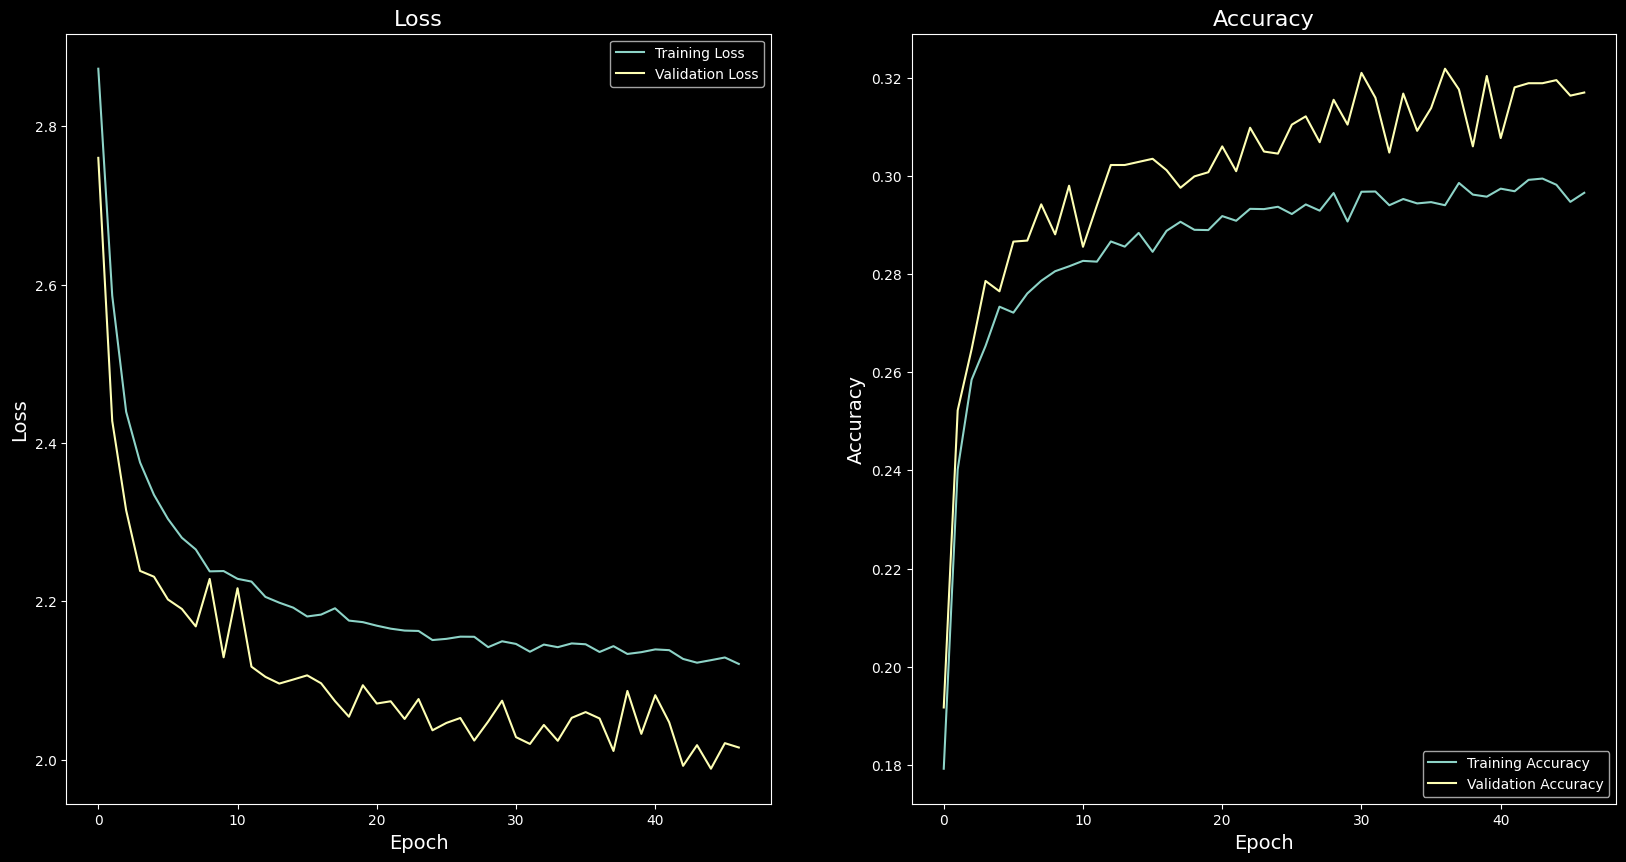

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
model = best_age_model

plt.style.use('dark_background')

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.title('Loss', fontsize=16) 
plt.plot(history_age.history['loss'], label='Training Loss')
plt.plot(history_age.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch', fontsize=14) 
plt.ylabel('Loss', fontsize=14)
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.title('Accuracy', fontsize=16)  
plt.plot(history_age.history['accuracy'], label='Training Accuracy')
plt.plot(history_age.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=14) 
plt.ylabel('Accuracy', fontsize=14)
plt.legend(loc='lower right')

plt.show()


In [8]:
test_age = 88
expected_class = test_age // 4
age_range = get_age_range(expected_class)
print(f"Ålder: {test_age}, Åldersklass: {expected_class}, Åldersspann: {age_range}")


Ålder: 88, Åldersklass: 22, Åldersspann: 88-91
